# PW05 - Group 4
* Florian Bär
* Matthias Egli
* Manuel Vogel
* Adrian Willi

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras import Model

In [23]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [24]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [25]:
x_train.shape[1:]

(32, 32, 3)

In [26]:
import matplotlib.pyplot as plt

def print_curves(history):
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.legend()
  plt.show()
  # plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.show()
  plt.close()

## a) + b) Baseline

Epoch 1/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3644 - accuracy: 0.5062 - val_loss: 1.1402 - val_accuracy: 0.5971
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9215 - accuracy: 0.6762 - val_loss: 0.9099 - val_accuracy: 0.6820
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7499 - accuracy: 0.7388 - val_loss: 0.8157 - val_accuracy: 0.7246
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6353 - accuracy: 0.7763 - val_loss: 0.8034 - val_accuracy: 0.7358
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5470 - accuracy: 0.8090 - val_loss: 0.8037 - val_accuracy: 0.7384
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4677 - accuracy: 0.8361 - val_loss: 0.7952 - val_accuracy: 0.7494
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4049 - accuracy: 0.8582 - val_loss: 0.8445 - val_accuracy:

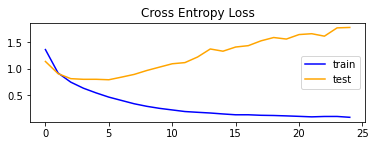

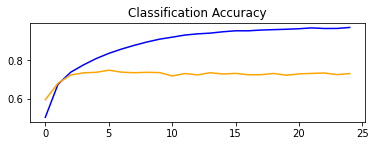

In [27]:
inputs = Input(shape=(x_train.shape[1:]))
x = inputs

for filters in [32, 64, 128]:
  x = Conv2D(
      filters=filters, kernel_size=3, strides=1, padding="same", kernel_initializer='he_uniform'
  )(x)
  x = ReLU()(x)
  x = MaxPooling2D(pool_size=2)(x)

x = Flatten()(x)
x = Dense(units=128, kernel_initializer='he_uniform')(x)
x = ReLU()(x)
x = Dense(units=64, kernel_initializer='he_uniform')(x)
x = ReLU()(x)
outputs = Dense(units=10, activation='softmax')(x)


model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=1, epochs=25)
print_curves(history)

## c) Using tanh

Epoch 1/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3976 - accuracy: 0.4938 - val_loss: 1.1324 - val_accuracy: 0.5968
Epoch 2/25
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0233 - accuracy: 0.6389 - val_loss: 0.9915 - val_accuracy: 0.6550
Epoch 3/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8999 - accuracy: 0.6830 - val_loss: 0.9660 - val_accuracy: 0.6679
Epoch 4/25
1563/1563 [==============================] - 5s 4ms/step - loss: 0.8255 - accuracy: 0.7101 - val_loss: 0.9377 - val_accuracy: 0.6761
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7548 - accuracy: 0.7372 - val_loss: 0.9588 - val_accuracy: 0.6752
Epoch 6/25
1563/1563 [==============================] - 5s 4ms/step - loss: 0.6941 - accuracy: 0.7593 - val_loss: 0.9152 - val_accuracy: 0.6870
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6418 - accuracy: 0.7774 - val_loss: 0.9081 - val_accuracy:

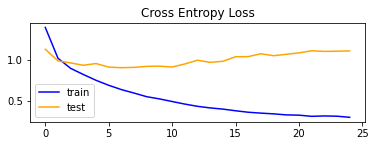

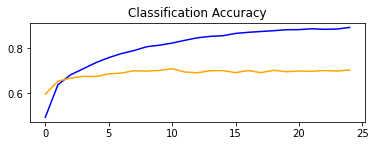

In [28]:
inputs = Input(shape=(x_train.shape[1:]))
x = inputs

for filters in [32, 64, 128]:
  x = Conv2D(
      filters=filters, kernel_size=3, strides=1, padding="same", kernel_initializer='he_uniform', activation='tanh'
  )(x)
  x = MaxPooling2D(pool_size=2)(x)

x = Flatten()(x)
x = Dense(units=128, kernel_initializer='he_uniform', activation='tanh')(x)
x = Dense(units=64, kernel_initializer='he_uniform', activation='tanh')(x)
outputs = Dense(units=10, activation='softmax')(x)


model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=1, epochs=25)
print_curves(history)

## d) With batch normalization

### relu

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2367 - accuracy: 0.5654 - val_loss: 1.0781 - val_accuracy: 0.6242
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8707 - accuracy: 0.6938 - val_loss: 0.9067 - val_accuracy: 0.6843
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7187 - accuracy: 0.7497 - val_loss: 0.8732 - val_accuracy: 0.6919
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6048 - accuracy: 0.7900 - val_loss: 0.8064 - val_accuracy: 0.7237
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5071 - accuracy: 0.8235 - val_loss: 0.7783 - val_accuracy: 0.7351
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4252 - accuracy: 0.8517 - val_loss: 0.8581 - val_accuracy: 0.7326
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3617 - accuracy: 0.8746 - val_loss: 0.7874 - val_accuracy:

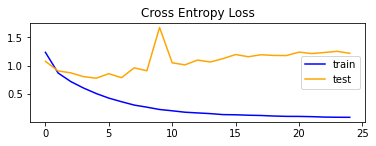

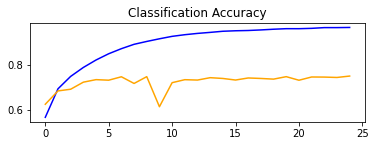

In [29]:
inputs = Input(shape=(x_train.shape[1:]))
x = inputs
activation = 'relu'

for filters in [32, 64, 128]:
  x = Conv2D(
      filters=filters, kernel_size=3, strides=1, padding="same", kernel_initializer='he_uniform', activation=activation
  )(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=2)(x)

x = Flatten()(x)
x = Dense(units=128, kernel_initializer='he_uniform', activation=activation)(x)
x = BatchNormalization()(x)
x = Dense(units=64, kernel_initializer='he_uniform', activation=activation)(x)
x = BatchNormalization()(x)
outputs = Dense(units=10, activation='softmax')(x)


model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=1, epochs=25)
print_curves(history)


### tanh

Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4899 - accuracy: 0.4657 - val_loss: 1.2794 - val_accuracy: 0.5343
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1639 - accuracy: 0.5874 - val_loss: 1.2129 - val_accuracy: 0.5652
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0228 - accuracy: 0.6427 - val_loss: 1.0146 - val_accuracy: 0.6425
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9419 - accuracy: 0.6720 - val_loss: 1.0763 - val_accuracy: 0.6317
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8822 - accuracy: 0.6917 - val_loss: 1.0125 - val_accuracy: 0.6483
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8278 - accuracy: 0.7113 - val_loss: 1.0332 - val_accuracy: 0.6445
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7818 - accuracy: 0.7289 - val_loss: 1.0497 - val_accuracy:

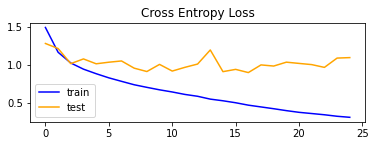

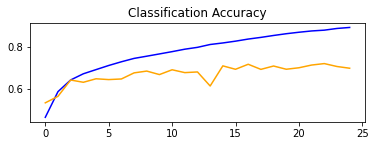

In [30]:
inputs = Input(shape=(x_train.shape[1:]))
x = inputs
activation = 'tanh'

for filters in [32, 64, 128]:
  x = Conv2D(
      filters=filters, kernel_size=3, strides=1, padding="same", kernel_initializer='he_uniform', activation=activation
  )(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=2)(x)

x = Flatten()(x)
x = Dense(units=128, kernel_initializer='he_uniform', activation=activation)(x)
x = BatchNormalization()(x)
x = Dense(units=64, kernel_initializer='he_uniform', activation=activation)(x)
x = BatchNormalization()(x)
outputs = Dense(units=10, activation='softmax')(x)


model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=1, epochs=25)
print_curves(history)


## e) Adding dropouts for dense layers

In [31]:
from time import perf_counter
from contextlib import contextmanager

@contextmanager
def catchtime() -> float:
    start = perf_counter()
    yield lambda: perf_counter() - start

### Without batchnorm

In [32]:
inputs = Input(shape=(x_train.shape[1:]))
x = inputs
activation = 'relu'

for filters in [32, 64, 128]:
  x = Conv2D(
      filters=filters, kernel_size=3, strides=1, padding="same", kernel_initializer='he_uniform', activation=activation
  )(x)
  x = MaxPooling2D(pool_size=2)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(units=128, kernel_initializer='he_uniform', activation=activation)(x)
x = Dropout(0.2)(x)
x = Dense(units=64, kernel_initializer='he_uniform', activation=activation)(x)
x = Dropout(0.2)(x)
outputs = Dense(units=10, activation='softmax')(x)


model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
with catchtime() as t:
  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=1, epochs=25)
print(f"Execution time without batchnorm: {t():.4f} secs")


Epoch 1/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5633 - accuracy: 0.4289 - val_loss: 1.1580 - val_accuracy: 0.5857
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1354 - accuracy: 0.5955 - val_loss: 0.9566 - val_accuracy: 0.6549
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9624 - accuracy: 0.6637 - val_loss: 0.8611 - val_accuracy: 0.7064
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8590 - accuracy: 0.7044 - val_loss: 0.8579 - val_accuracy: 0.7050
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7824 - accuracy: 0.7312 - val_loss: 0.7825 - val_accuracy: 0.7323
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7266 - accuracy: 0.7502 - val_loss: 0.8094 - val_accuracy: 0.7216
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6738 - accuracy: 0.7660 - val_loss: 0.7374 - val_accuracy:

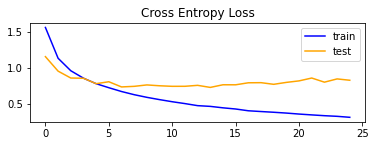

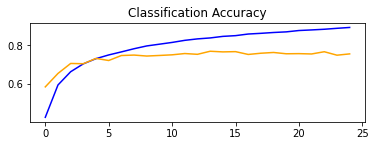

In [33]:
print_curves(history)

### With batchnorm

In [34]:
inputs = Input(shape=(x_train.shape[1:]))
x = inputs
activation = 'relu'

for filters in [32, 64, 128]:
  x = Conv2D(
      filters=filters, kernel_size=3, strides=1, padding="same", kernel_initializer='he_uniform', activation=activation
  )(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=2)(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(units=128, kernel_initializer='he_uniform', activation=activation)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(units=64, kernel_initializer='he_uniform', activation=activation)(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
outputs = Dense(units=10, activation='softmax')(x)


model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
with catchtime() as t:
  history = model.fit(x_train, y_train, validation_data=(x_test, y_test), verbose=1, epochs=25)
print(f"Execution time with batchnorm: {t():.4f} secs")


Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4552 - accuracy: 0.4840 - val_loss: 1.1017 - val_accuracy: 0.6078
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0317 - accuracy: 0.6393 - val_loss: 0.9183 - val_accuracy: 0.6739
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8813 - accuracy: 0.6942 - val_loss: 0.8410 - val_accuracy: 0.7097
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7856 - accuracy: 0.7288 - val_loss: 0.8350 - val_accuracy: 0.7071
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7108 - accuracy: 0.7562 - val_loss: 0.9202 - val_accuracy: 0.6890
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6463 - accuracy: 0.7770 - val_loss: 0.6697 - val_accuracy: 0.7708
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5972 - accuracy: 0.7935 - val_loss: 0.6784 - val_accuracy:

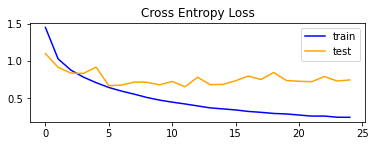

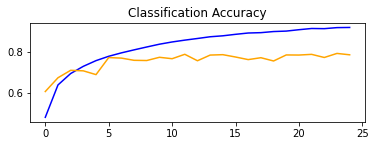

In [35]:
print_curves(history)

In [36]:
with catchtime() as t:
  import time
  time.sleep(4)
  print(f"Execution time: {t():.4f} secs")

Execution time: 4.0025 secs


## f) Discussion



*   Relu vs Tanh: Tanh activation seems to be performing about 3% worse than relu on average. Also tanh appears to lead to more fluctuation during convergence.
*   Batchnorm: Batchnorm helps to improve the performance for another 2%, but seems to work better with relu compared to tanh. In terms of convergence speed up, the examples above show that the speedup factor for this example lies somewhere around 3-5x.
*   Dropout: Dropout regulariztation increases the validation accuracy to almost 76%. As expected, overfitting is reduced by distributing the gained knownledge between the different nodes in the network.





